In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), cool 2D arrays
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import torch
import ray

# takes the training data spreadsheet (csv) and puts it into two panda arrays #
trainData = pd.read_csv("Data Science/Competitions/Titanic/train.csv")
testData = pd.read_csv("Data Science/Competitions/Titanic/test.csv")


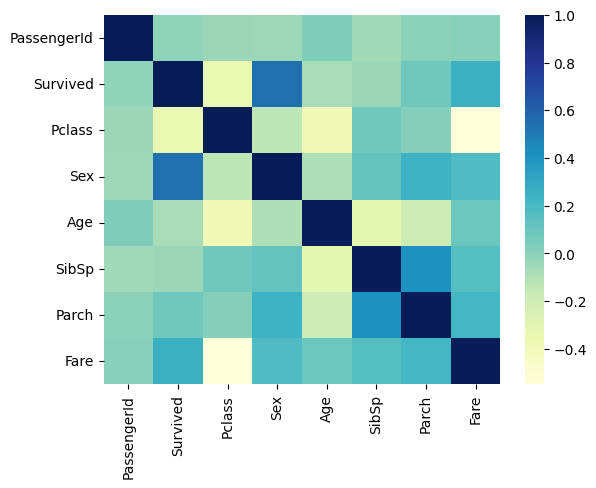

In [4]:
import seaborn as sns

#Turns Sex into numbers due to SNS heatmap working with numbers better then words
trainData['Sex'] = trainData['Sex'].map({'male': 0, 'female': 1})
testData['Sex'] = testData['Sex'].map({'male': 0, 'female': 1})
#For more data view in SNS heatmap turn String basted information into Numbers

numeric_columns = trainData.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()


# Note Does not Work in Windows #SNS heatmap replaces this feature
"""The functions below display information about the data"""
# This predicts importance of our features 
def predictImportance():
    tfDataSet = tfdf.keras.pd_dataframe_to_tf_dataset(trainData, label='Survived')

    model = tfdf.keras.RandomForestModel()
    model.fit(tfDataSet)

    print(model.summary())



In [5]:

names = ["RandomForest200",
         "LinearSVC",
         #"MultinomialNB",
         "Logistic",
         "KNN5",
         "SVCLinear",
         "SVCgamma2",
         "DecisionTree5",
         #"RandomForest5-10",
         #"MLP-2000-1000-500-100",
         "AdaBoost",
         "HistGradientBoost",
         "GradientBoosting",  # New model
         "Bagging"            # New model
        ]


abrevNames = ["RF2",
         "LSVC",
         #"MNB",
         "Log",
         "KNN5",
         "SVCL",
         "SVCg",
         "DT5",
         "RF51",
         #"MLP",
         #"AB",
         "HGB",
         "GB",    # New model
         "Bag"    # New model
        ]

models = [
        RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=0),
        LinearSVC(max_iter=750, dual=True),
        #MultinomialNB(),
        LogisticRegression(random_state=5),
        KNeighborsClassifier(n_neighbors=6, weights="uniform"),
        SVC(kernel="linear", C=2.2),
        SVC(gamma=0.34, C=2),
        DecisionTreeClassifier(max_depth=15),
        RandomForestClassifier(n_estimators=750, max_depth=7, max_features=3),
        #MLPClassifier(hidden_layer_sizes=(2000,1000,500,100)),
        #MLPClassifier(hidden_layer_sizes=(100,50,10)),
        #AdaBoostClassifier(),
        HistGradientBoostingClassifier(categorical_features=[]),
        GradientBoostingClassifier(n_estimators=300, max_depth=3, learning_rate=.1),  # New model
        BaggingClassifier(n_estimators=300)            # New model
    ]

"""The funtions bellow act on the data"""
# just prints the data
def printData():
  pd.set_option("display.max_rows", 10)
  print(f"Train data=\n{trainData}")
  print(f"Test data=\n{testData}")

# makes the column Family column which is the sum of Sibsp (siblingings/spouses) and Parch (Parens/Children)
def family():
  trainData["Family"] = trainData["SibSp"] + trainData["Parch"]
  testData["Family"] = testData["SibSp"] + testData["Parch"]

  print("   Created 'Family' column.")


# makes the column Last Name column which is just the peroson last name
def lastName():
  trainData["LastName"] = trainData["Name"].str.split(',').str[0]
  testData["LastName"] = testData["Name"].str.split(',').str[0]

  print("   Created 'LastName' column.")

# This is a function
def makeFamCodes():
  trainNameSet = set(trainData["LastName"])
  testNameSet = set(testData["LastName"])

  print(f"THIS IS MY SET {trainNameSet}")

  trainData["FamCode"] = 0
  testData["FamCode"] = 0

  i = 0
  for name in trainNameSet:
    trainData["FamCode"] += trainData["LastName"].apply(lambda s: i if s == name else 0)

    i = i + 1

  i = 0
  for name in testNameSet:
    testData["FamCode"] += testData["LastName"].apply(lambda s: i if s == name else 0)

    i = i + 1


#Trial for Gloun written one way Testing to see whitch set up produces higher %
#PRoduces 75.6%
def gluon():
  
    # Assuming 'trainData' and 'testData' are defined outside this function and include all necessary columns
    # Specify the columns to use
    columns_to_use = ["Sex", "Fare", "Age", "Pclass", "Parch", "Survived", "PassengerId"]
    test_columns_to_use = [col for col in columns_to_use if col != "Survived"]  # Exclude 'Survived' for test data

    # Select specified columns for the training data. Ensure 'Survived' is included in the training data
    train_data = TabularDataset(trainData)[columns_to_use]
    
    # Select specified columns for the test data, excluding 'Survived'
    test_data = TabularDataset(testData)[test_columns_to_use]

    # Define predictor and fit the model with 'best_quality' preset for potentially better performance
    predictor = TabularPredictor(label='Survived', eval_metric='accuracy').fit(
       train_data, 
       presets='best_quality')

    # Make predictions on the test data
    predictions = predictor.predict(test_data)

    # Get PassengerID from test data
    passenger_ids = test_data['PassengerId']

    # Combine PassengerID and predictions into a DataFrame
    results_df = pd.DataFrame({'PassengerId': passenger_ids, "Survived": predictions})

    # Save the results to a CSV file
    results_df.to_csv('predictions.csv', index=False)


# Trial 2 for Gloun writen another way. 
#Produce 79%

def gluon_optimized(trainData, testData):
    # Define the columns to use
    columns_to_use = ["Sex", "Fare", "Age", "Pclass", "Parch", "Survived", "PassengerId"]
    test_columns_to_use = [col for col in columns_to_use if col != "Survived"]  # Exclude 'Survived' from test data

    # Select specified columns
    train_data = TabularDataset(trainData)[columns_to_use]
    test_data = TabularDataset(testData)[test_columns_to_use]

    # Define the predictor with path to save models
    predictor = TabularPredictor(label='Survived', eval_metric='accuracy', path='ag_models').fit(
        train_data=train_data,
        presets='best_quality',  # Use the best quality preset
        auto_stack=True,  # Enable automatic stacking
        num_stack_levels=10,  # You can adjust this based on performance and computational resources
        time_limit=3600 * 10,  # Set a time limit for the search (optional, adjust based on needs)
        hyperparameters='multimodal',  # Use a wide range of models including neural networks
        hyperparameter_tune_kwargs={'num_trials': 10,
                                     'scheduler': 'local',
                                       'searcher': 'auto',
                                      }  # Optimize hyperparameters
    )

    # Predictions
    predictions = predictor.predict(test_data)
    passenger_ids = test_data['PassengerId']
    results_df = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
    results_df.to_csv('predictions_optimized.csv', index=False)

# FILLING in NULLS #
#Takes all the nulls and puts in the mean/average of the col
def wrangleQ0():
  code_on = False #Set True to Turns on Cabin and Ticket Filling Nul information with Mean information from data set

  # Age and Fair Mean caculation are on by defult

  trainData["Age"] = trainData["Age"].fillna(trainData["Age"].mean())
  testData["Age"] = testData["Age"].fillna(testData["Age"].mean())

  trainData["Fare"] = trainData["Fare"].fillna(trainData["Fare"].mean())
  testData["Fare"] = testData["Fare"].fillna(testData["Fare"].mean())

  if code_on == True: 
    # Extract numerical part from "Cabin" column
    trainData['Cabin'] = trainData['Cabin'].str.extract('(\d+)')
    testData['Cabin'] = testData['Cabin'].str.extract('(\d+)')

    # Convert numerical part to numeric type
    trainData['Cabin'] = pd.to_numeric(trainData['Cabin'], errors='coerce')
    testData['Cabin'] = pd.to_numeric(testData['Cabin'], errors='coerce')

    # Replace missing values in "Cabin" with mean
    trainData['Cabin'].fillna(trainData['Cabin'].mean(), inplace=True)
    testData['Cabin'].fillna(testData['Cabin'].mean(), inplace=True)

    # Extract numerical part from "Ticket" column
    trainData['Ticket'] = trainData['Ticket'].str.extract('(\d+)')
    testData['Ticket'] = testData['Ticket'].str.extract('(\d+)')

    # Convert numerical part to numeric type
    trainData['Ticket'] = pd.to_numeric(trainData['Ticket'], errors='coerce')
    testData['Ticket'] = pd.to_numeric(testData['Ticket'], errors='coerce')

    #Replace missing values in "Ticket" with mean
    trainData['Ticket'].fillna(trainData['Ticket'].mean(), inplace=True)
    testData['Ticket'].fillna(testData['Ticket'].mean(), inplace=True)

  print("   Nulls Filled.")


# Remove rows with nulls in them #
def wrangleDelNull():
  trainData.dropna(inplace=True)
  testData.dropna(inplace=True)


# forces all numeric data to be withing 0 to 1
#has optional param that acccepts a list of columns to ignore
def wrangleNorm(exclude=[]):
  # change this to do all numeric columns!
  tempDF = testData.select_dtypes(include=np.number)
  columns = []

  # this is for if you want to exclude a ceetain column (feature)
  # it only adds colmuns that are not in th einclude list tot he columns list
  for col in tempDF.columns:
    if (col not in exclude):
      columns = columns + [col]

  #iterates through every numeric column
  for col in columns:
      trainData[col] = (trainData[col] - trainData[col].min()) / (trainData[col].max() - trainData[col].min())
      testData[col] = (testData[col] - testData[col].min()) / (testData[col].max() - testData[col].min())

  print("   Normalized numeric columns.")
  

# displays correlation data give a training data set #
def displayCorrelations():
                                          #Correlation values
    print(f"\nCorrelation Summary:\nPearson Coef:{trainData.corr(method = 'pearson')}\n\nKendall Coef:{trainData.corr(method = 'kendall')}\n\nSpearman Coef:{trainData.corr(method = 'spearman')}\n")

    #big corrolation chart
    trainData.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
    plt.tight_layout(pad=2)
    plt.show()

    # histograms
    trainData.hist()
    plt.tight_layout(pad=2)
    plt.show()

    # scatter plot matrix
    scatter_matrix(trainData)
    plt.tight_layout(pad=.1)
    plt.show()


# This tests the models #
def testModels(features):
    print(f"\nTesting models based on: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])

    results = []

    i = 0
    for model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
        model_name = names[i]
        i = i + 1
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        print('%s: %f (%f)' % (model_name, cv_results.mean(), cv_results.std()))

    plt.boxplot(results, labels=abrevNames)
    plt.title('Algorithm Comparison')
    plt.show()


def outputPredictionsList(features):
    print(f"   Using Features: {features}")
    # what we want to predict #
    y = trainData["Survived"]

    # Change Categorical to numeric #
    X = pd.get_dummies(trainData[features])
    XTest = pd.get_dummies(testData[features])

    predictionsList = []

    for model in models:
        model.fit(X, y)
        prediction = model.predict(XTest)
        predictionsList.append(prediction)

    return np.array(predictionsList)

# Takes each models predictions for each person and takes the average to round to the most likely outcome
def outputConcensus(preditcionsList):
  print("   Making Concensus...")
  concensus = np.mean(predictionsList, axis=0)
  #print(concensus)
  return (np.rint(concensus)).astype(int)

# Create an output dataframe and write it to csv file #
def modelToCSV(prediction):
    output = pd.DataFrame({'PassengerId': testData.PassengerId, "Survived": prediction})
    output.to_csv('submission.csv', index=False)

    # just so we can see the submission in the console #
    submission = pd.read_csv('submission.csv')
    print(f"CSV submission conents:\n{submission}")

# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
    
    # METHOD CALLS #

#displayCorrelations(trainData)

In [6]:
""" WRANGLING """
print('\nWrangling...')
wrangleQ0()

#wrangleDelNull(trainData, testData)
wrangleNorm(exclude=["PassengerId"])
#printData()

""" FEATURE ENGINEERING """
print('\nCreating Features...')
family()
lastName()
makeFamCodes()
printData()
#gluon()
gluon_optimized(trainData, testData)


# feature sets! #
features = ["Sex","Fare","Age","Pclass","Parch"]
features1 = ['PassengerId', 'Pclass', 'Name', 'Sex', 'Embarked', 'Family', 'LastName', 'FamCode']
features2 = ["Sex","Fare","Age","Family","Pclass","Ticket","Cabin","Embarked","FamCode"]
featuresALL = ["Sex","Fare","Age","Family","Pclass","Name","Ticket","Cabin","Embarked","PassengerId","FamCode"]

""" TESTING """
#predictImportance()
testModels(features)
#testModels(features1)
#testModels(features2)
#testModels(featuresALL)

""" For  predictiing & submitting """
print('\nPredicting...')
#prediction = outPrediction()
predictionsList = outputPredictionsList(features)
#print(predictionsList)
concensus = outputConcensus(predictionsList)
#print(concensus)
modelToCSV(concensus)


Wrangling...
   Nulls Filled.
   Normalized numeric columns.

Creating Features...
   Created 'Family' column.
   Created 'LastName' column.
THIS IS MY SET {'Adams', 'Buss', 'Maenpaa', 'Ivanoff', 'Perkin', 'Norman', 'Blank', 'Icard', 'Kalvik', 'Cairns', 'Hawksford', 'Lemore', 'Kassem', 'Kiernan', 'Johannesen-Bratthammer', 'Adahl', 'Kallio', 'Shellard', 'Holverson', 'Jenkin', 'Murphy', 'Rosblom', 'Danoff', 'del Carlo', 'Plotcharsky', 'Robert', 'Bonnell', 'McCormack', 'Augustsson', 'Marechal', 'Myhrman', 'Tornquist', 'Reeves', 'Dooley', 'Gaskell', 'Millet', 'Ryerson', 'Appleton', 'Hewlett', 'Coleridge', 'Sinkkonen', 'Givard', 'Wiklund', 'Lehmann', 'Richards', 'Bidois', 'Weisz', 'Padro y Manent', 'Asim', 'Gilnagh', 'Rugg', 'Sirota', 'Stone', 'Soholt', 'Gee', 'Beane', 'Meo', 'Bjornstrom-Steffansson', 'Jensen', 'Shorney', 'Sharp', 'Gronnestad', 'Burke', 'Chip', 'Odahl', 'Warren', 'Louch', 'Lobb', 'Lefebre', 'Nicholls', 'Williams-Lambert', 'Johnston', 'Partner', 'Andersson', 'Quick', 'Eusti

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=10, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 36000 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: ag_models\ds_sub_fit\sub_fit_ho.


Train data=
     PassengerId  Survived  Pclass  \
0              1         0     1.0   
1              2         1     0.0   
2              3         1     1.0   
3              4         1     0.0   
4              5         0     1.0   
..           ...       ...     ...   
886          887         0     0.5   
887          888         1     0.0   
888          889         0     1.0   
889          890         1     0.0   
890          891         0     1.0   

                                                  Name  Sex       Age  SibSp  \
0                              Braund, Mr. Owen Harris  0.0  0.271174  0.125   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  1.0  0.472229  0.125   
2                               Heikkinen, Miss. Laina  1.0  0.321438  0.000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  1.0  0.434531  0.125   
4                             Allen, Mr. William Henry  0.0  0.434531  0.000   
..                                                 

C:\Users\scout\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\autogluon\tabular\predictor\predictor.py:1187: UserWarning: Failed to use ray for memory safe fits. Falling back to normal fit. Error: ValueError('ray==2.10.0 detected. 2.6.3 <= ray < 2.7.0 is required. You can use pip to install certain version of ray `pip install ray==2.6.3` ')
  stacked_overfitting = self._sub_fit_memory_save_wrapper(
Beginning AutoGluon training ... Time limit = 9000s
AutoGluon will save models to "ag_models\ds_sub_fit\sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.0.1b20240321
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          16
Memory Avail:       17.76 GB / 31.72 GB (56.0%)
Disk Space Avail:   288.23 GB / 476.05 GB (60.5%)
Train Data Rows:    792
Train Data Columns: 6
Label Column:       Survived
Problem Ty

  0%|          | 0/10 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.10.0 detected. 2.6.3 <= ray < 2.7.0 is required. You can use pip to install certain version of ray `pip install ray==2.6.3` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 271. Best iteration is:
	[29]	valid_set's binary_error: 0.151515
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's binary_error: 0.171717


	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1\T1 ...
	0.8409	 = Validation score   (accuracy)
	7.21s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T2 ...
	0.8396	 = Validation score   (accuracy)
	8.22s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T4 ...
	0.8346	 = Validation score   (accuracy)
	12.83s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T5 ...
	0.8384	 = Validation score   (accuracy)
	5.49s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1\T6 ...
	0.8321	 = Validation score   (

  0%|          | 0/10 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


KeyboardInterrupt: 